# Notebook Purpose
This notebook contains a handful of basic visualization about our datasette requests data. 

In [1]:
import pandas as pd

from usage_metrics.resources.sqlite import SQLiteManager

%config InlineBackend.figure_format = 'retina'

In [3]:
engine = SQLiteManager().get_engine()
print(engine)

with engine.connect() as con:
    logs = pd.read_sql_table("datasette_request_logs", con)

logs.info()

Engine(sqlite:////Users/apple/catalyst/business/usage_metrics/data/usage_metrics.db)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162936 entries, 0 to 162935
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   insert_id               162936 non-null  object        
 1   request_method          162936 non-null  object        
 2   request_url             162936 non-null  object        
 3   request_size            162936 non-null  int64         
 4   status                  162936 non-null  int64         
 5   response_size           162922 non-null  float64       
 6   user_agent              162921 non-null  object        
 7   remote_ip               162936 non-null  object        
 8   server_ip               162936 non-null  object        
 9   referer                 1570 non-null    object        
 10  latency                 162936 non-null  float64       
 11  protoc

## Request Volume
Number of requests for ferc1 and pudl tables and downloads per week.

<AxesSubplot:xlabel='Week', ylabel='Number of Data Requests'>

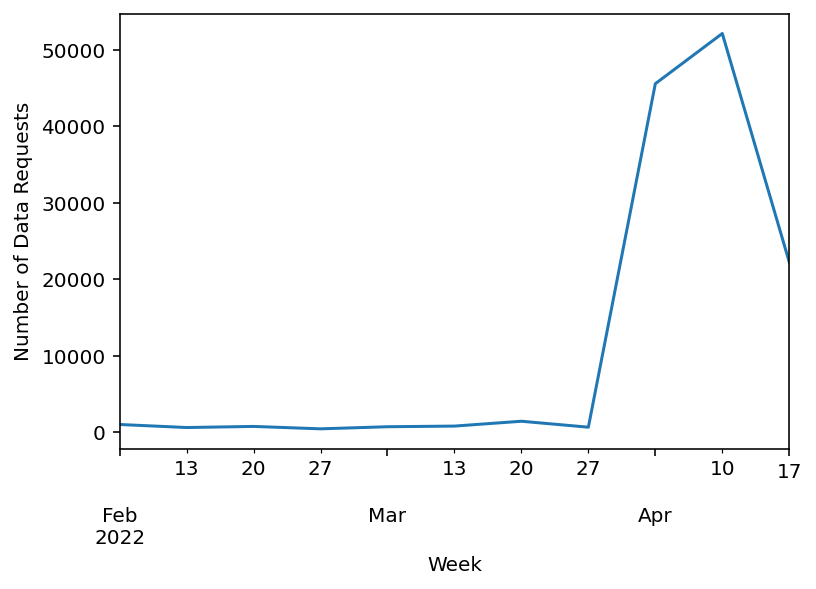

In [3]:
logs.set_index("timestamp").resample("1W").count().request_url_path.plot(xlabel="Week", ylabel="Number of Data Requests")

## Top Data Requests
The top datasette path requests. This includes json, csv and db downloads.

### Number of top data requests

<AxesSubplot:title={'center':'Requests by Data Path'}, ylabel='Number of Requests'>

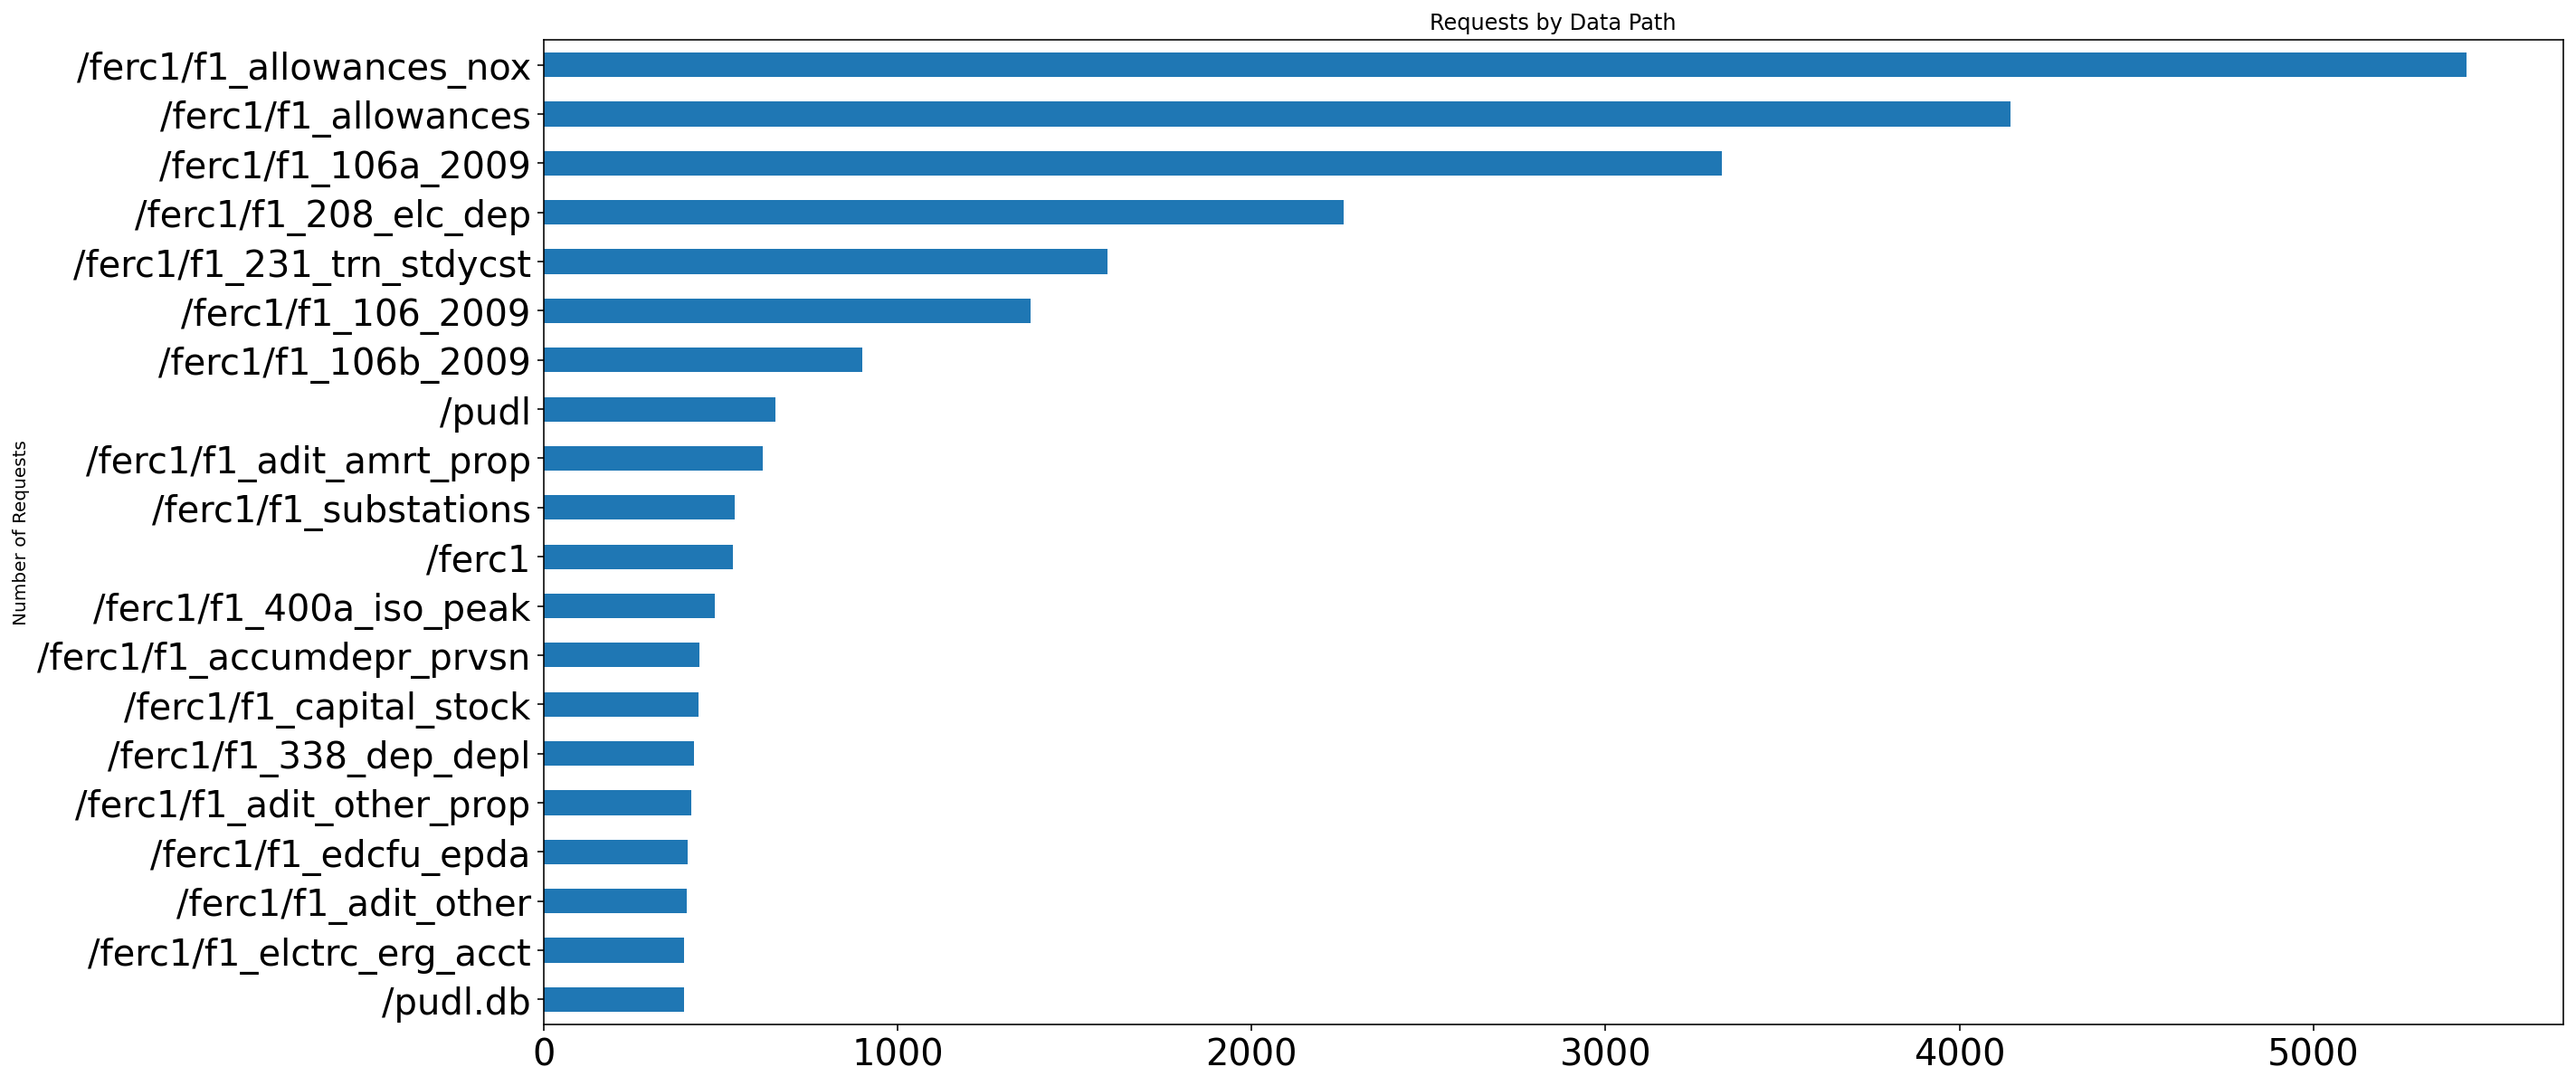

In [4]:
top_n = 20

logs.request_url_path.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by Data Path")

### Percent of all requests

This chart shows 19.978590968560443 % of all data requests.


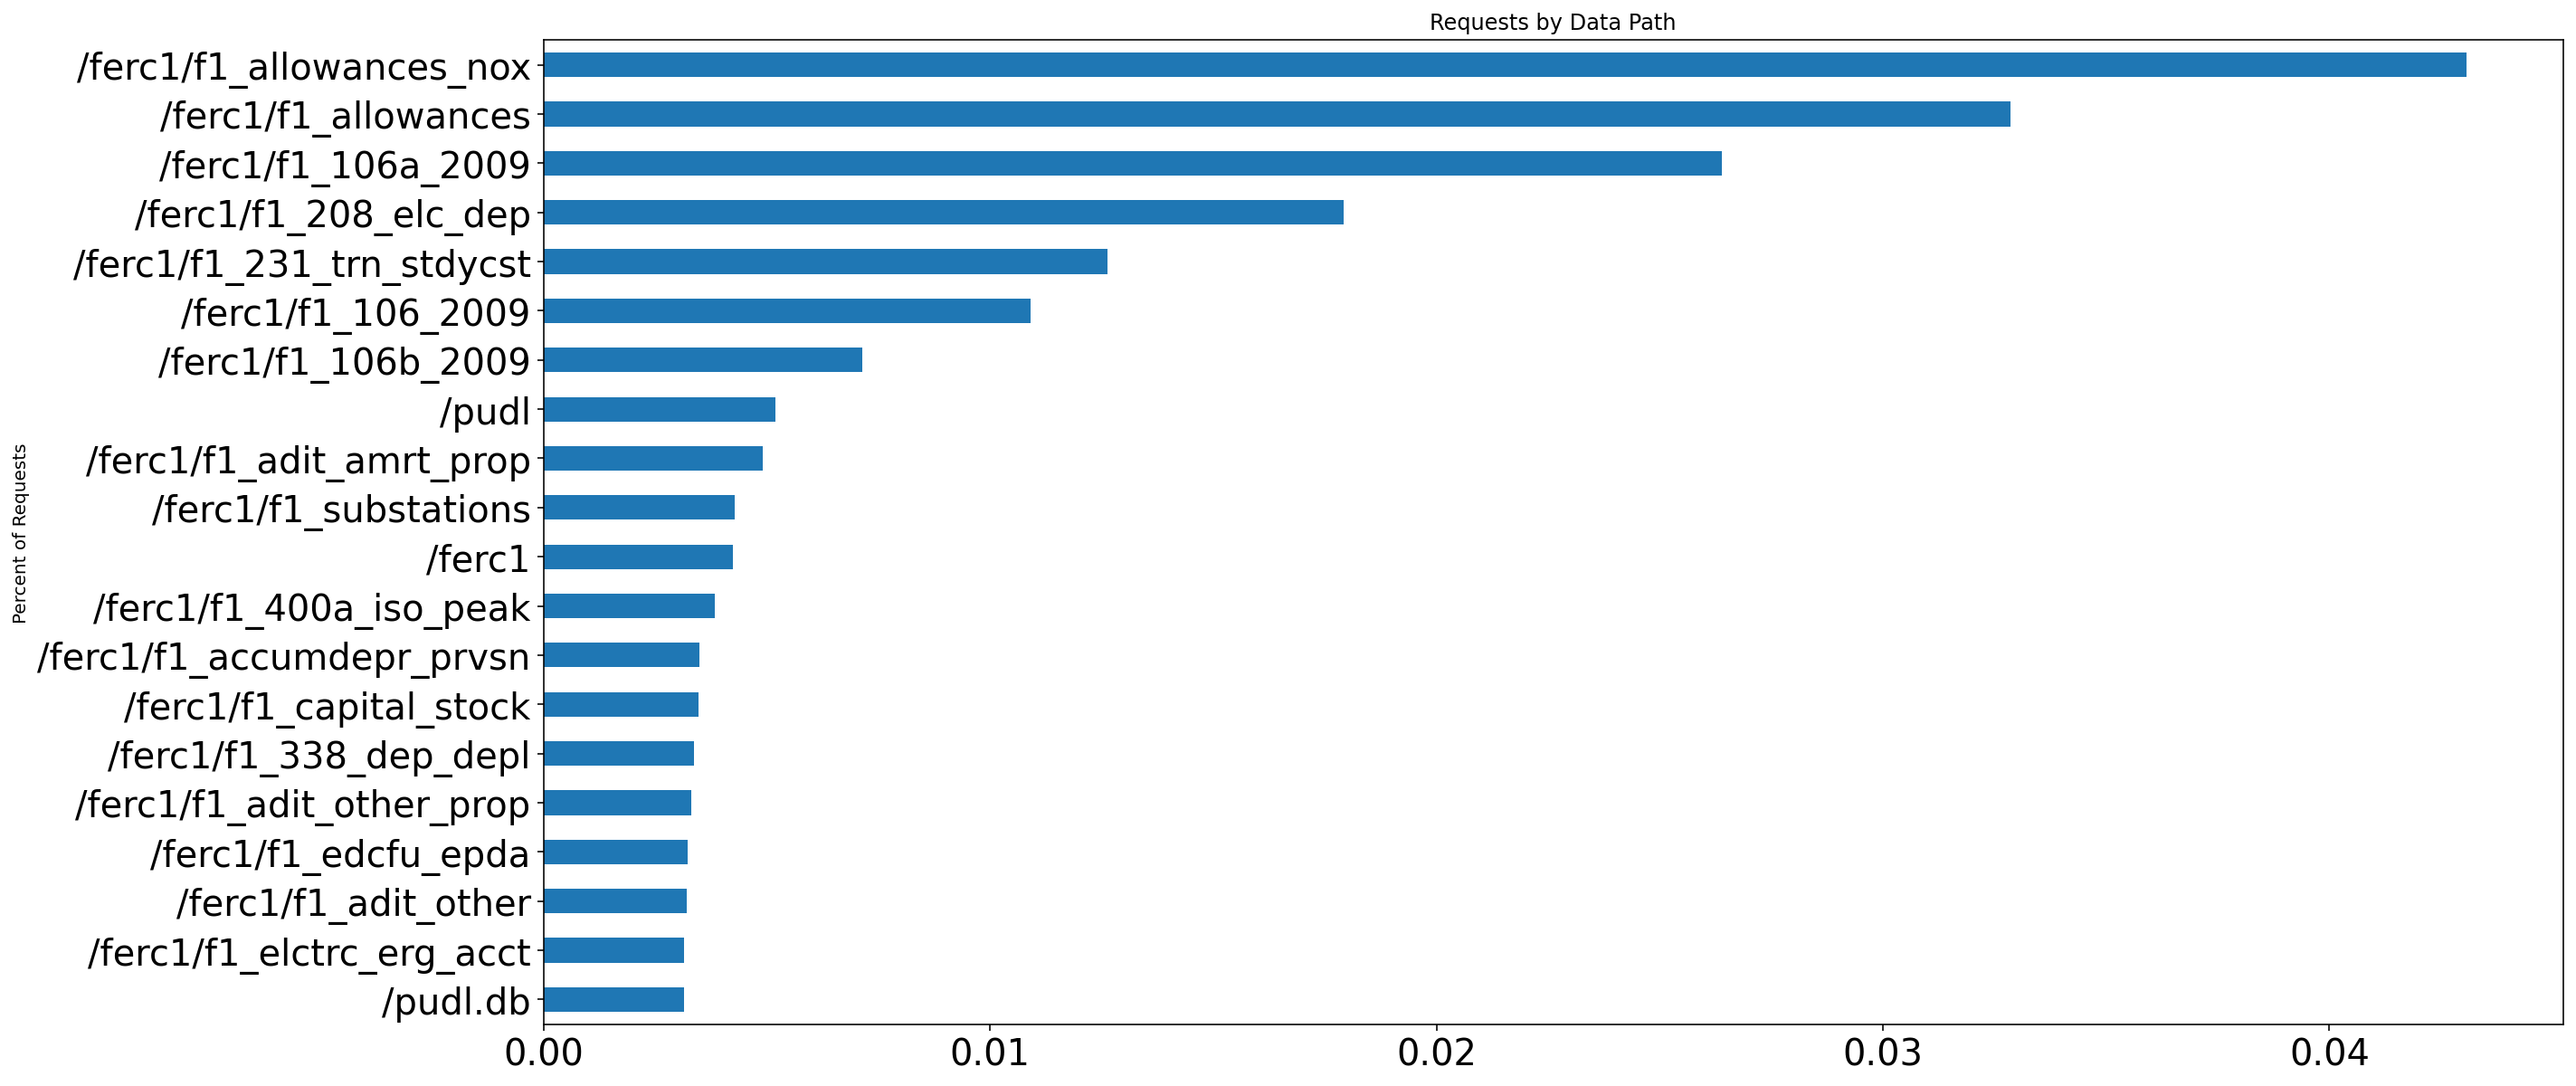

In [5]:
top_n = 20

top_paths = logs.request_url_path.value_counts(normalize=True).head(top_n)

top_paths.sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Percent of Requests", title="Requests by Data Path")

print(f"This chart shows {top_paths.sum() * 100} % of all data requests.")

## Top Organizations
Most organizations are generic internet providers however universities often have their own network set up. Unfortunately ipinfo charges for organization type so we have do some simple string filtering for now.  

In [11]:
logs.remote_ip_org.value_counts().head(10)

Hetzner Online GmbH                                              118514
Comcast Cable Communications, LLC                                   977
Vodafone GmbH                                                       807
IPXO UK LIMITED                                                     665
Microsoft Corporation                                               605
Charter Communications Inc                                          556
Southern New England Telephone Company and SNET America, Inc.       543
Sonic Telecom LLC                                                   401
AT&T Services, Inc.                                                 175
York University                                                     161
Name: remote_ip_org, dtype: int64

<AxesSubplot:title={'center':'Requests by Academic Organization'}, ylabel='Number of Requests'>

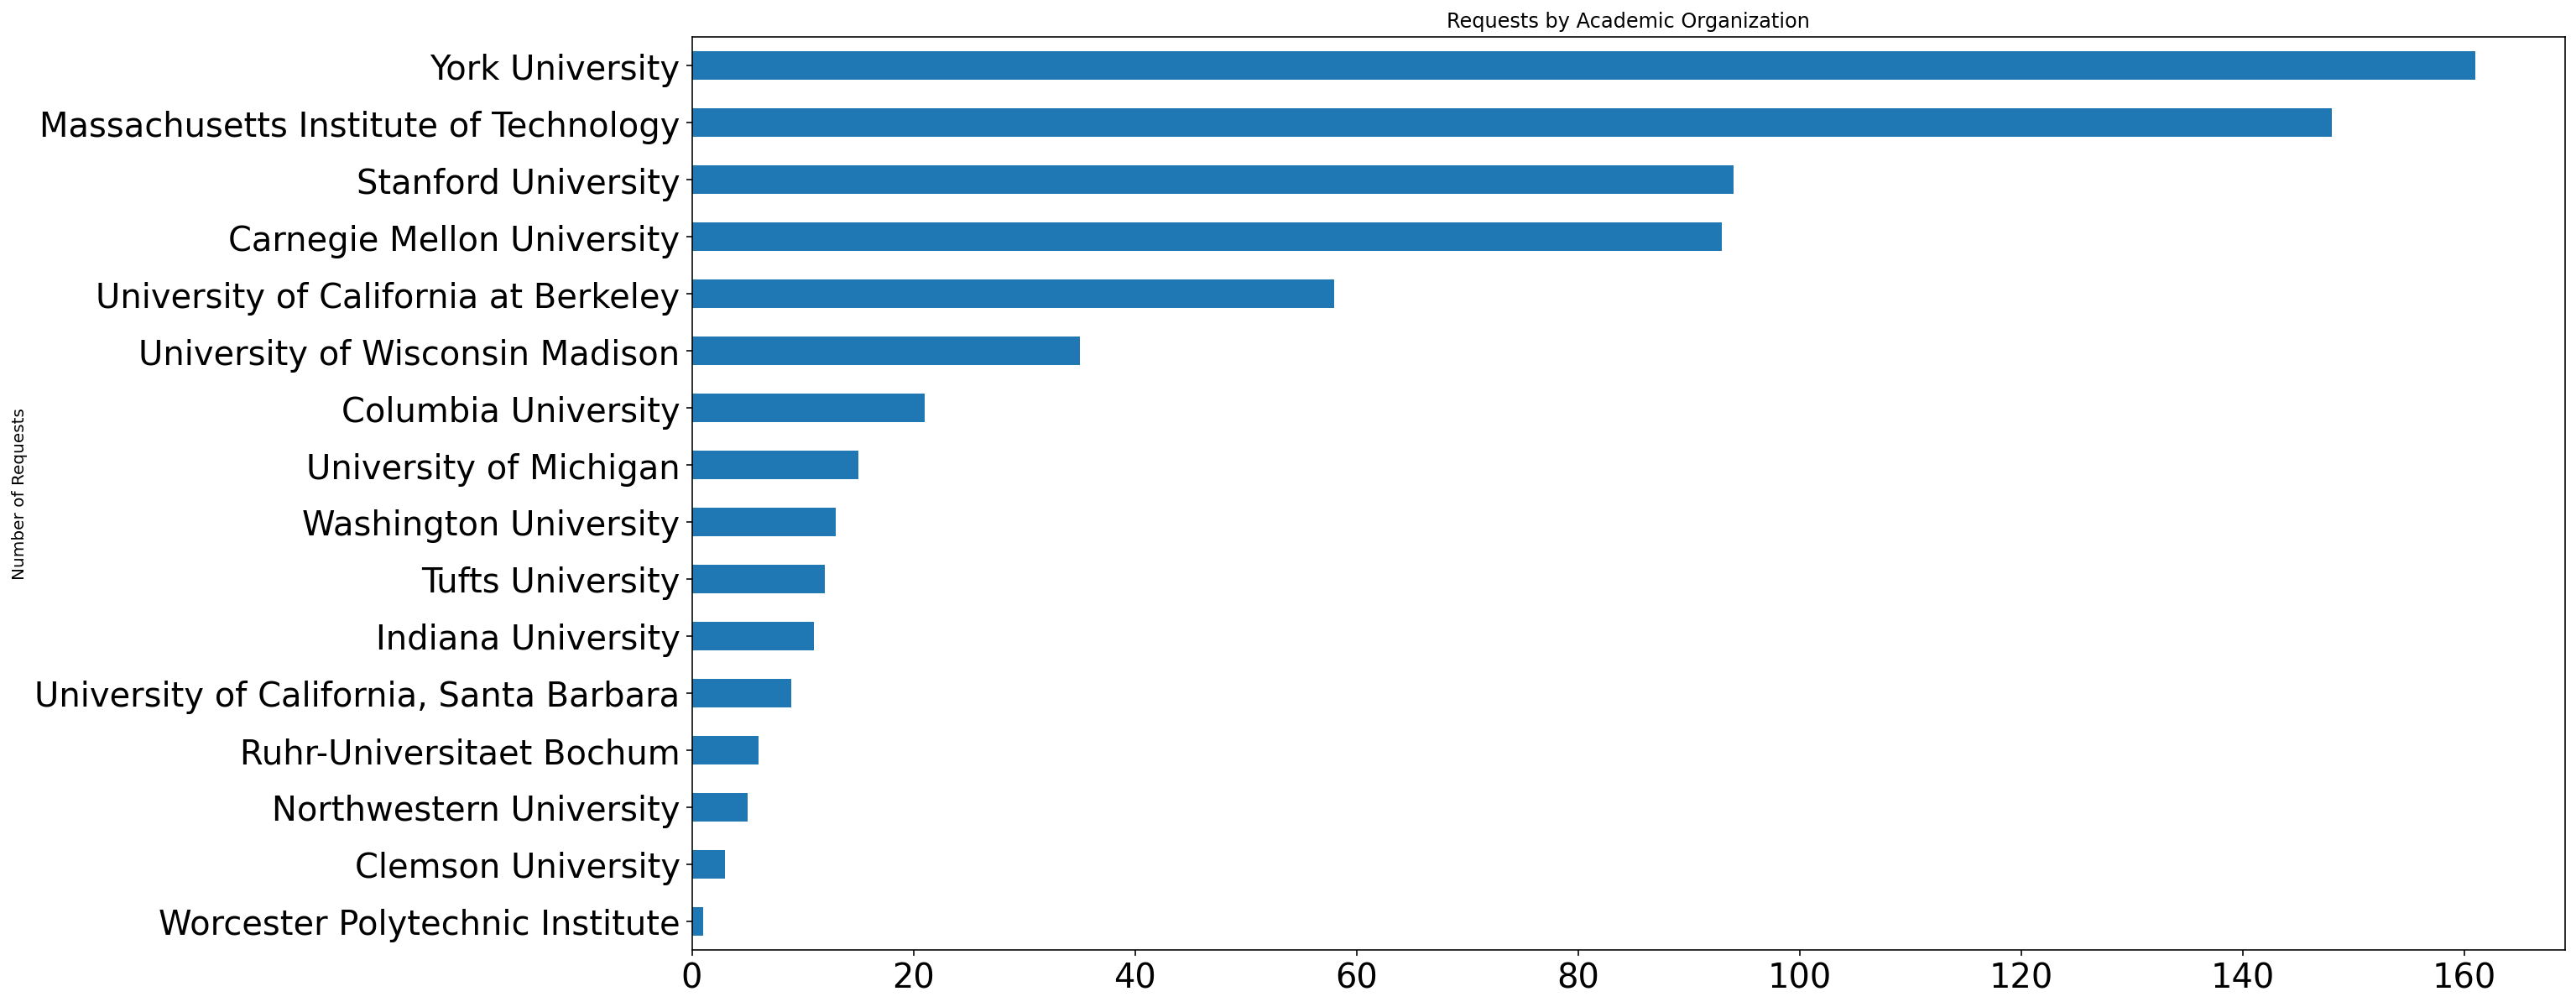

In [6]:
university_substrings = ["Universitaet", "University", "College", "Institute"]

is_uni = logs.remote_ip_org.str.contains("|".join(university_substrings))

logs[is_uni].remote_ip_org.value_counts().sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by Academic Organization")

## Top Cities

<AxesSubplot:title={'center':'Requests by City'}, ylabel='Number of Requests'>

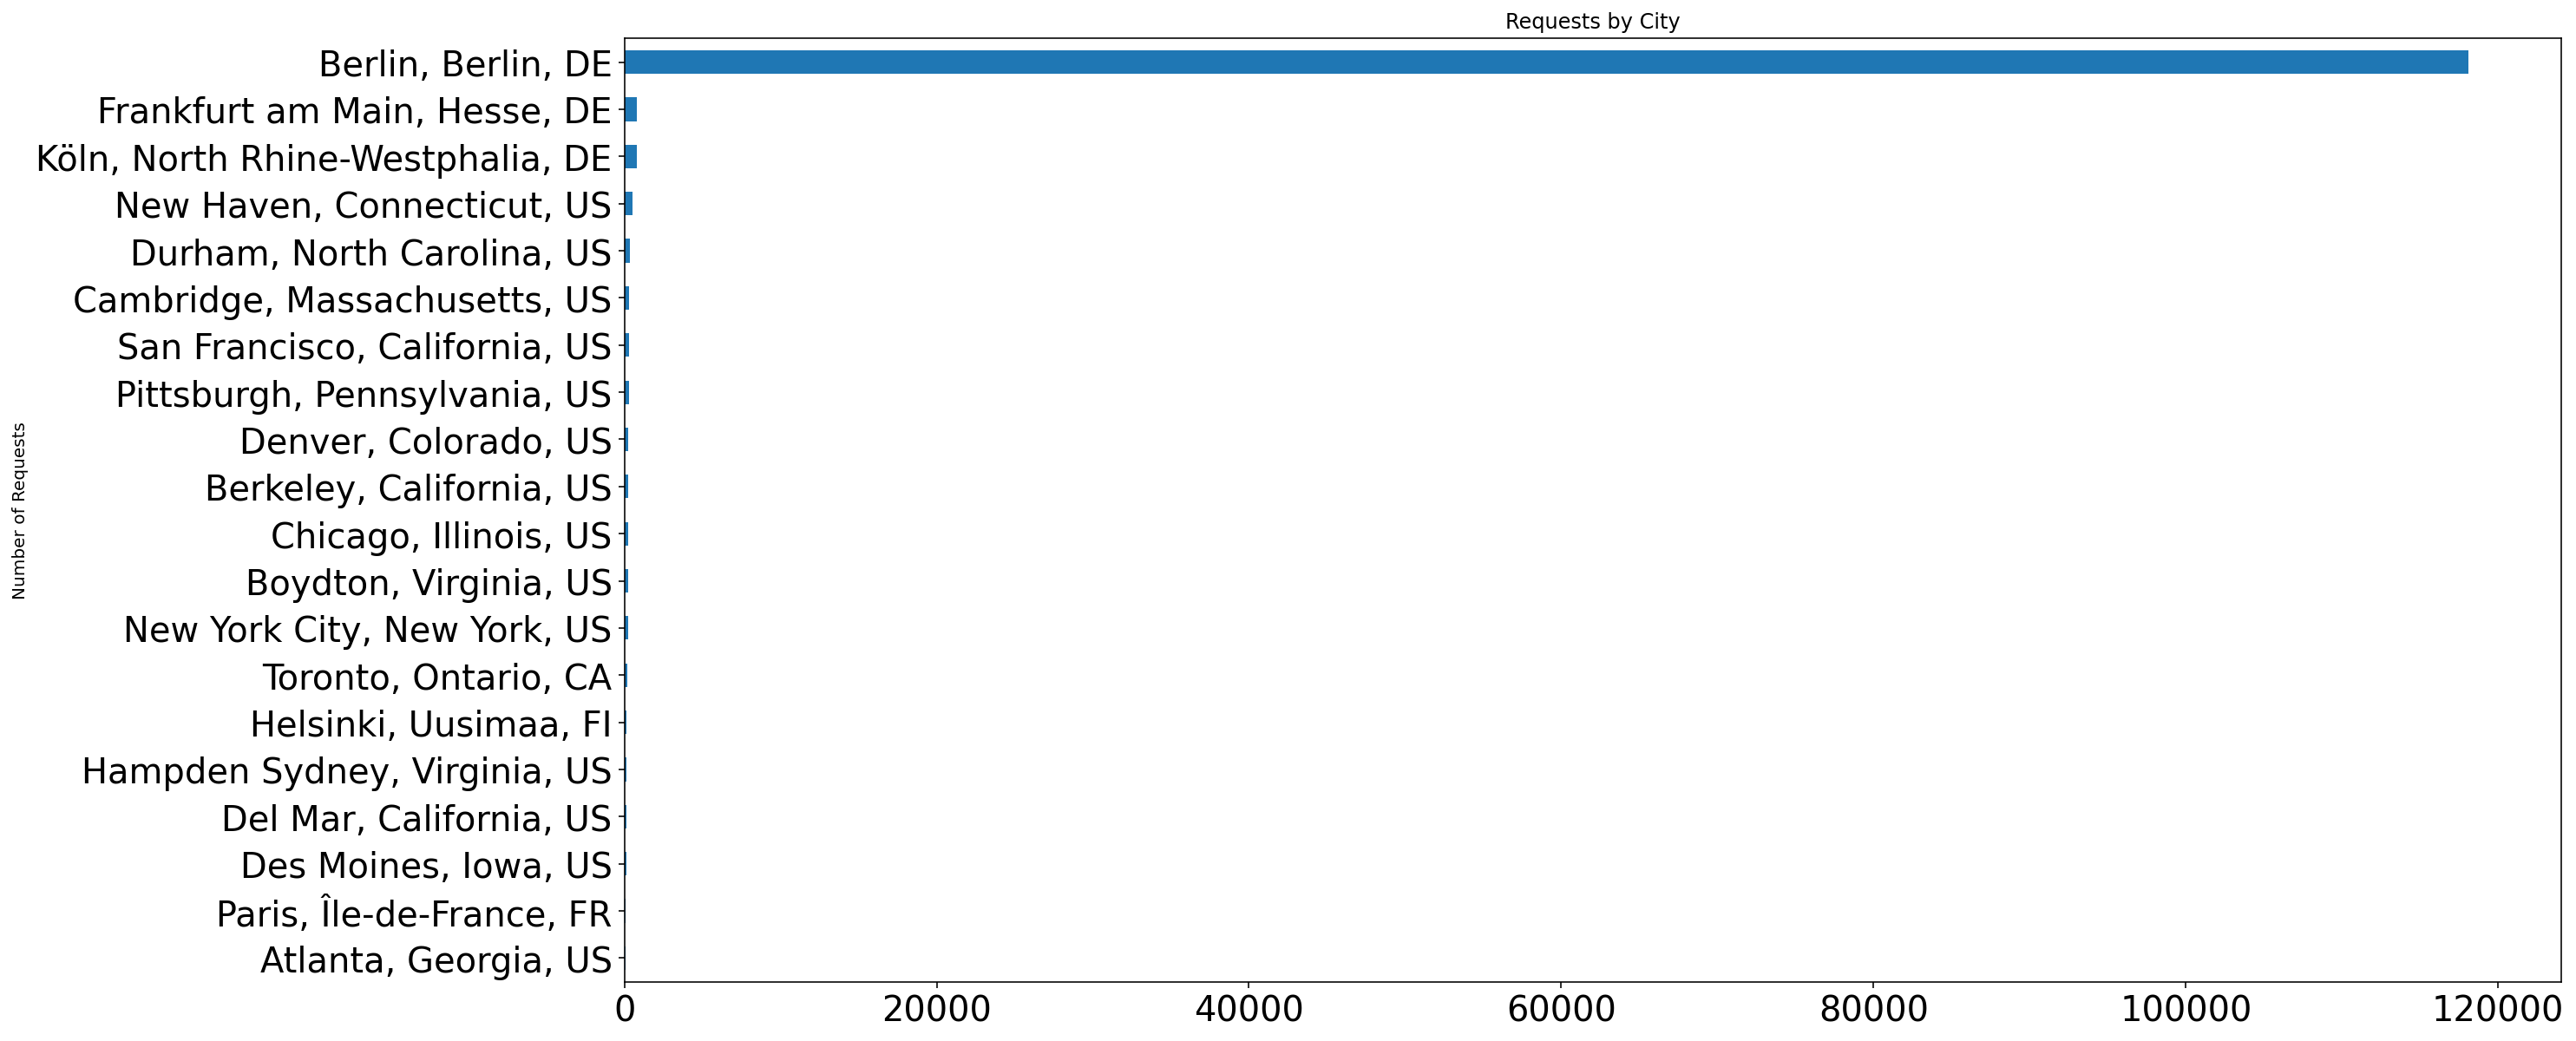

In [7]:
top_n = 20

full_location = logs.remote_ip_city + ", " + logs.remote_ip_region + ", " + logs.remote_ip_country

full_location.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by City")

## Top referers

In [8]:
logs.referer.isna().value_counts()

True     124647
False      1468
Name: referer, dtype: int64

Most referers are null.

<AxesSubplot:title={'center':'Top Referers'}, ylabel='Number of Referals'>

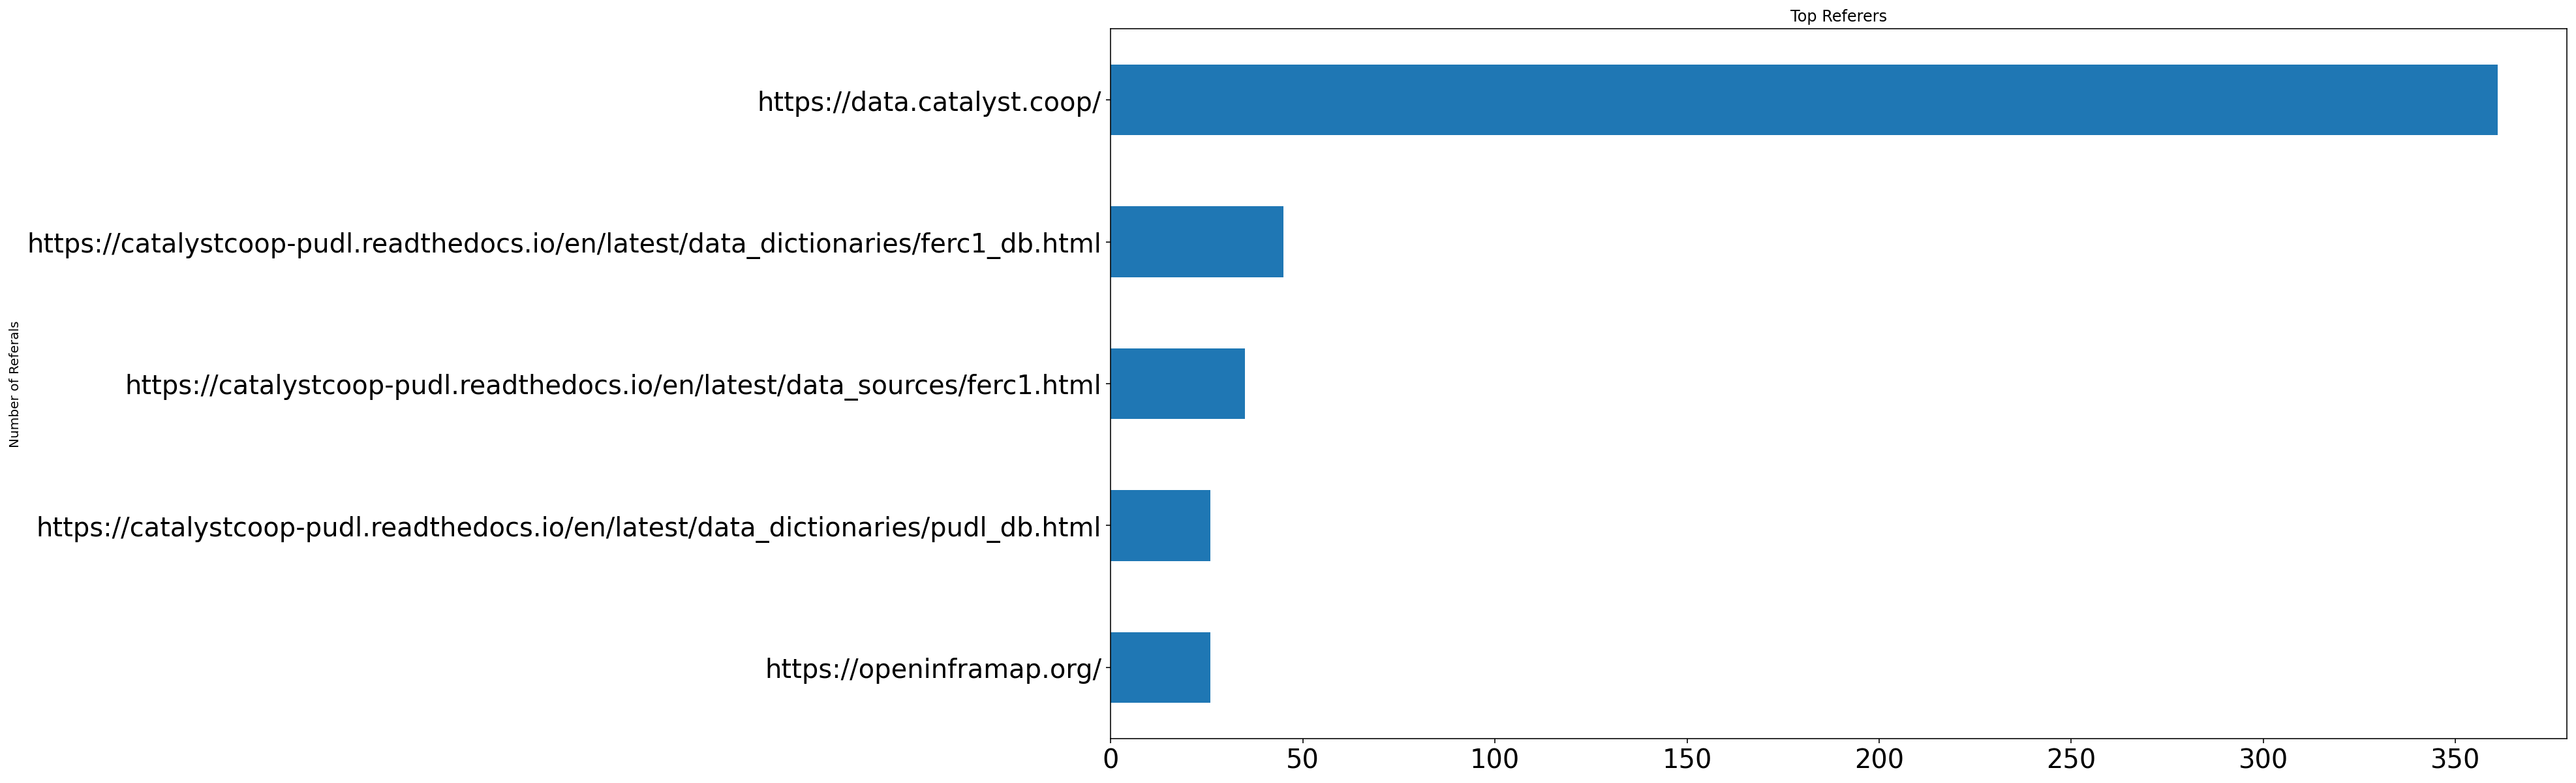

In [9]:
top_n = 5

logs.referer.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Referals", title="Top Referers")